<a href="https://colab.research.google.com/github/RickPardono/Sistema-de-recomenda-o-de-livros/blob/main/C%C3%B3pia_de_Projeto_Aplicado_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings_data = pd.read_csv('/content/ratings.csv')
books_metadata = pd.read_csv('/content/books.csv')

In [ ]:
ratings_data.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [ ]:
ratings_data.shape

(5976479, 3)

In [ ]:
ratings_data.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [ ]:
ratings_data.duplicated().sum()

0

In [ ]:
books_metadata.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
books_metadata.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [ ]:
books_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [ ]:
books_metadata.shape

In [ ]:
books_metadata.duplicated().sum()

0

In [ ]:
# Quantidade total de usuários
ratings_data['user_id'].nunique()

53424

In [ ]:
# Quantidade total de livros avaliados
ratings_data['book_id'].nunique()

10000

In [ ]:
# Quantidade total de livros
books_metadata['book_id'].nunique()

10000

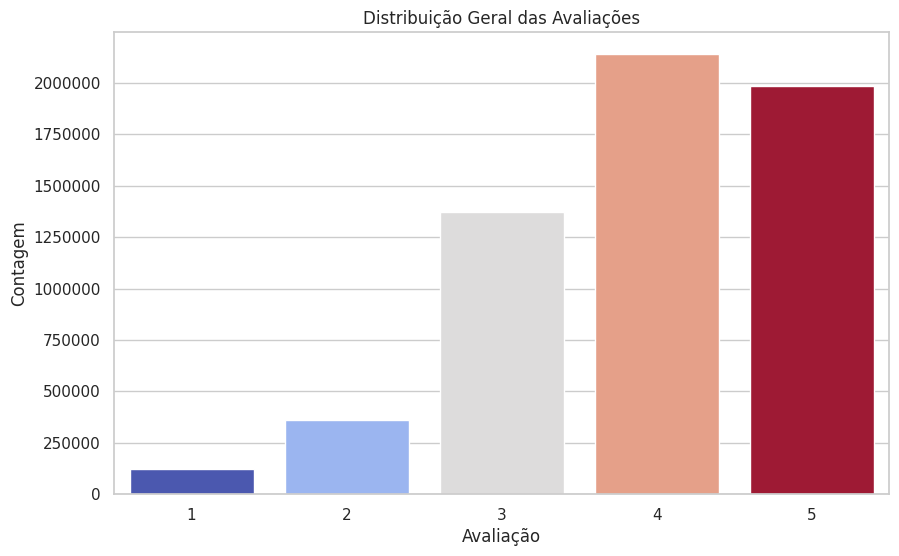

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='rating', data=ratings_data, palette='coolwarm', legend=False)

# Adicionando título e labels
plt.title('Distribuição Geral das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')

# Alterando a formatação do eixo y para mostrar os valores reais
plt.ticklabel_format(style='plain', axis='y')



plt.show()

In [ ]:
# Agrupando pelo 'book_id' e contando o número de avaliações
ratings_per_book = ratings_data.groupby('book_id').size()

# Filtrando os livros com menos de 50 avaliações
books_with_less_than_50_ratings = ratings_per_book[ratings_per_book < 50]

# Contando quantos livros têm menos de 50 avaliações
number_of_books_less_than_50_ratings = books_with_less_than_50_ratings.count()

print(f"Quantidade de livros avaliados menos de 50 vezes: {number_of_books_less_than_50_ratings}")

Quantidade de livros avaliados menos de 50 vezes: 9


In [ ]:
# Obtendo os IDs dos livros com menos de 50 avaliações
book_ids_less_than_50_ratings = books_with_less_than_50_ratings.index

# Localizando esses livros no DataFrame de metadados dos livros
books_info_less_than_50_ratings = books_metadata[books_metadata['book_id'].isin(book_ids_less_than_50_ratings)]

# Exibindo as informações dos livros
print(books_info_less_than_50_ratings)

In [ ]:
pip install surprise

In [ ]:
from surprise import Dataset,Reader

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings_data[['book_id','user_id','rating']],reader)

In [ ]:
data

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True,n_epochs=10)

In [ ]:
cross_validate(svd,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8519  0.8526  0.8517  0.8521  0.0004  
MAE (testset)     0.6651  0.6656  0.6651  0.6652  0.0002  
Fit time          53.70   55.67   57.51   55.63   1.56    
Test time         31.17   30.37   30.89   30.81   0.33    


{'test_rmse': array([0.85188171, 0.85261602, 0.85174443]),
 'test_mae': array([0.6650844 , 0.66555449, 0.6651044 ]),
 'fit_time': (53.701809883117676, 55.66516613960266, 57.5143826007843),
 'test_time': (31.16654324531555, 30.368162393569946, 30.891464471817017)}

In [ ]:
trainset = data.build_full_trainset()

In [ ]:
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [ ]:
svd.predict(uid=10, iid=100)

Prediction(uid=10, iid=100, r_ui=None, est=3.625111754718685, details={'was_impossible': False})

In [ ]:
import difflib
import random

def get_book_id(book_title, metadata):
    """
    Gets the book ID for a book title based on the closest match in the metadata dataframe.
    """
    existing_titles = list(metadata['title'].values)
    closest_titles = difflib.get_close_matches(book_title, existing_titles)
    book_id = metadata[metadata['title'] == closest_titles[0]]['book_id'].values[0]
    return book_id

In [ ]:
def get_book_info(book_id, metadata):
    """
    Returns some basic information about a book given the book id and the metadata dataframe.
    """
    book_info = metadata[metadata['book_id'] == book_id][['book_id', 'isbn','authors', 'title', 'original_title']]
    return book_info.to_dict(orient='records')

In [ ]:
def predict_review(user_id, book_title, model, metadata):
    """
    Predicts the review (on a scale of 1-5) that a user would assign to a specific book.
    """
    book_id = get_book_id(book_title, metadata)
    review_prediction = model.predict(uid=user_id, iid=book_id)
    return review_prediction.est

In [ ]:
def generate_recommendation(user_id, model, metadata, thresh=4, num_recommendations=3):
    """
    Generates book recommendations for a user based on a rating threshold. Only
    books with a predicted rating at or above the threshold will be recommended.
    This version recommends a specified number of books.

    Args:
    - user_id: The user ID for whom the recommendation is being generated.
    - model: The prediction model.
    - metadata: The dataframe containing book metadata.
    - thresh: The rating threshold above which books are recommended.
    - num_recommendations: The number of recommendations to generate.

    Returns:
    A list of dictionaries, each containing information about a recommended book.
    """
    book_titles = list(metadata['title'].values)
    recommendations = []

    for book_title in book_titles:
        if len(recommendations) >= num_recommendations:
            break
        rating = predict_review(user_id, book_title, model, metadata)
        if rating >= thresh:
            book_id = get_book_id(book_title, metadata)
            book_info = get_book_info(book_id, metadata)
            recommendations.append(book_info[0])

    return recommendations

In [ ]:
generate_recommendation(1000, svd, books_metadata)

[{'book_id': 2,
  'isbn': '439554934',
  'authors': 'J.K. Rowling, Mary GrandPré',
  'title': "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'original_title': "Harry Potter and the Philosopher's Stone"},
 {'book_id': 5,
  'isbn': '743273567',
  'authors': 'F. Scott Fitzgerald',
  'title': 'The Great Gatsby',
  'original_title': 'The Great Gatsby'},
 {'book_id': 6,
  'isbn': '525478817',
  'authors': 'John Green',
  'title': 'The Fault in Our Stars',
  'original_title': 'The Fault in Our Stars'}]